<a href="https://colab.research.google.com/github/crissyro/4-sem-university/blob/main/system_modeling/lab_3_plus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Гипотеза о влиянии вероятности передачи (β)

### Увеличение β приведет к экспоненциальному росту скорости распространения, но сократит продолжительность "эпидемии"

#### Параметры для теста:
`β = [0.1, 0.3, 0.5, 0.7]`
`Фиксировать: γ=0.1, I₀=0.99, S₀=0.01`

#### Метрики:

* Время достижения пика S(t)

* Максимальное значение S(t)

* Время перехода 50% популяции в R

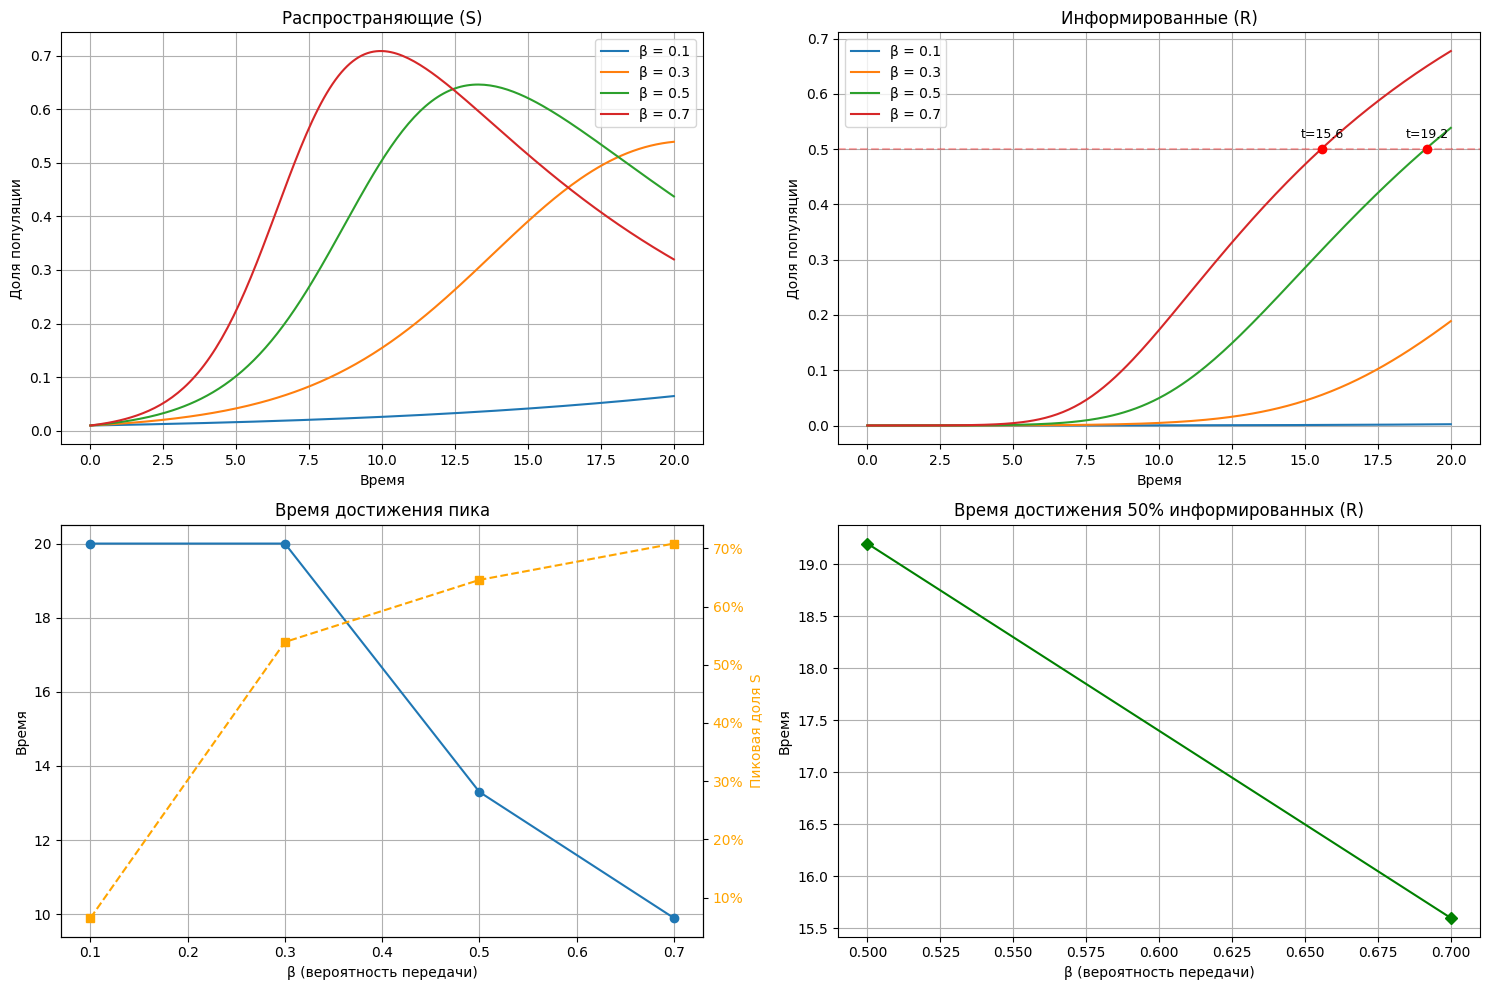


Результаты эксперимента:
β	Время пика S	Пик S (%)	Время 50% R
------------------------------------------------
0.1	20.000000000000014		6.488465835344283%		None
0.3	20.000000000000014		53.91082440512389%		None
0.5	13.299999999999969		64.58358446301435%		19.200000000000003
0.7	9.89999999999998		70.82981322398157%		15.59999999999996


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def simulate_spread(I, S, R, beta, gamma, dt, T):
    times, I_vals, S_vals, R_vals = [0], [I], [S], [R]
    t = 0

    peak_time = 0
    peak_value = S
    half_pop_time = None

    while t < T:
        dI = -beta * I * S * dt
        dS = (beta * I * S - gamma * S * (S + R)) * dt
        dR = gamma * S * (S + R) * dt

        I += dI
        S += dS
        R += dR
        t += dt

        if S > peak_value:
            peak_value = S
            peak_time = t

        if R >= 0.5 and half_pop_time is None:
            half_pop_time = t

        times.append(t)
        I_vals.append(I)
        S_vals.append(S)
        R_vals.append(R)

    return times, I_vals, S_vals, R_vals, peak_time, peak_value, half_pop_time

beta_values = [0.1, 0.3, 0.5, 0.7]
gamma = 0.1
I0, S0, R0 = 0.99, 0.01, 0.0
dt, T = 0.1, 20

metrics = []

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
for beta in beta_values:
    times, I, S, R, pt, pv, hpt = simulate_spread(I0, S0, R0, beta, gamma, dt, T)
    plt.plot(times, S, label=f'β = {beta}')
    metrics.append((beta, pt, pv, hpt))

plt.title('Распространяющие (S)')
plt.xlabel('Время')
plt.ylabel('Доля популяции')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
for beta in beta_values:
    times, I, S, R, pt, pv, hpt = simulate_spread(I0, S0, R0, beta, gamma, dt, T)
    plt.plot(times, R, label=f'β = {beta}')

    if hpt is not None:
        plt.scatter(hpt, 0.5, color='red', zorder=5)
        plt.text(hpt, 0.52, f't={hpt:.1f}', fontsize=9, ha='center')

plt.title('Информированные (R)')
plt.xlabel('Время')
plt.ylabel('Доля популяции')
plt.axhline(0.5, color='red', linestyle='--', alpha=0.3)
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
betas, peak_times, peak_values, half_times = zip(*metrics)

plt.plot(betas, peak_times, 'o-', label='Время пика S')
plt.xlabel('β (вероятность передачи)')
plt.ylabel('Время')
plt.title('Время достижения пика')
plt.grid(True)

ax2 = plt.twinx()
ax2.plot(betas, peak_values, 's--', color='orange', label='Пик S')
ax2.set_ylabel('Пиковая доля S', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.yaxis.set_major_formatter(PercentFormatter(1.0))

plt.subplot(2, 2, 4)
plt.plot(betas, half_times, 'D-', color='green')
plt.xlabel('β (вероятность передачи)')
plt.ylabel('Время')
plt.title('Время достижения 50% информированных (R)')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nРезультаты эксперимента:")
print("β\tВремя пика S\tПик S (%)\tВремя 50% R")
print("------------------------------------------------")
for m in metrics:
    beta, pt, pv, hpt = m
    print(f"{beta}\t{pt}\t\t{pv*100}%\t\t{hpt}")


### Интерпретация результатов:

Гипотеза **частично подтвердилась**:
1. Увеличение β действительно приводит к:
   - Ускорению распространения информации (более ранний пик S)
   - Сокращению времени достижения 50% информированных
   
2. Однако:
   - При малых β (0.1-0.3) распространение не достигает значимых масштабов
   - Рост пикового значения S не носит экспоненциальный характер
   - Для запуска "эпидемии" необходим минимальный β≈0.5

---

## Гипотеза: Существование "коллективного иммунитета" в распространении информации

### При фиксированных β и γ существует критическая начальная доля неинформированных (I₀*), ниже которой:

* Информация не получает массового распространения

* Пиковая доля распространяющих (S_max) незначительна

* Большая часть популяции остается неинформированной (I(∞) ≈ I₀)

* Эпидемия либо не начинается, либо быстро затухает

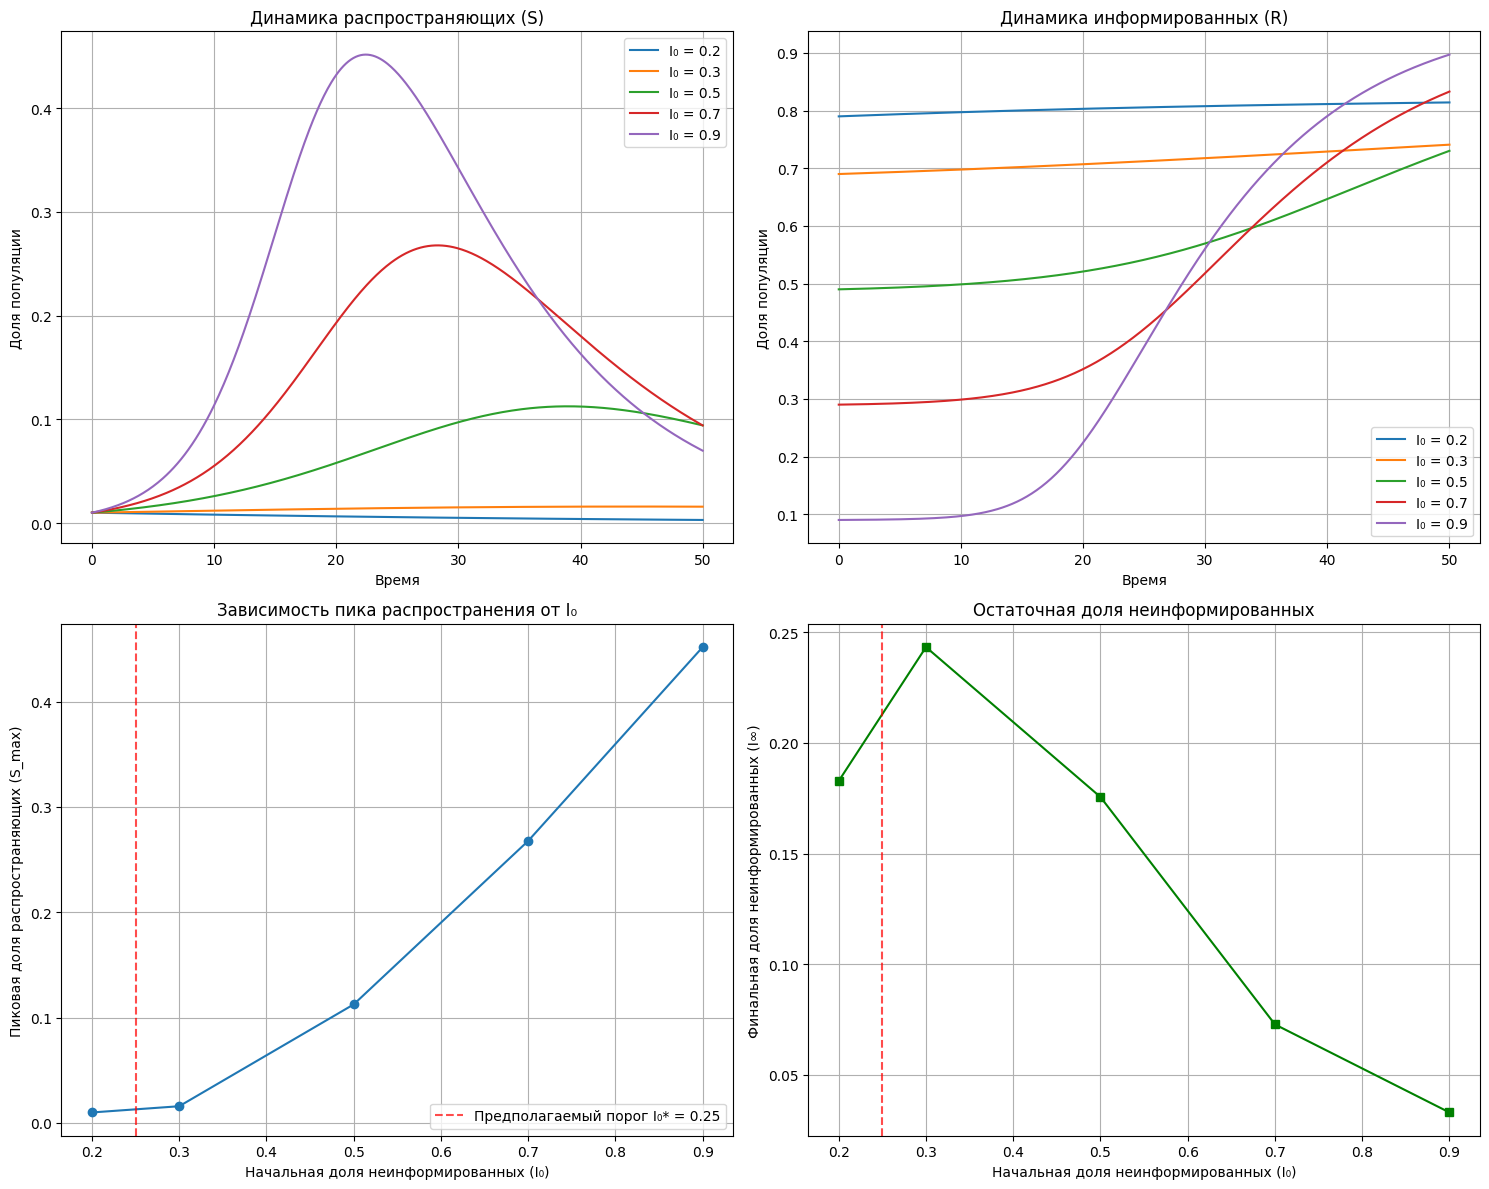

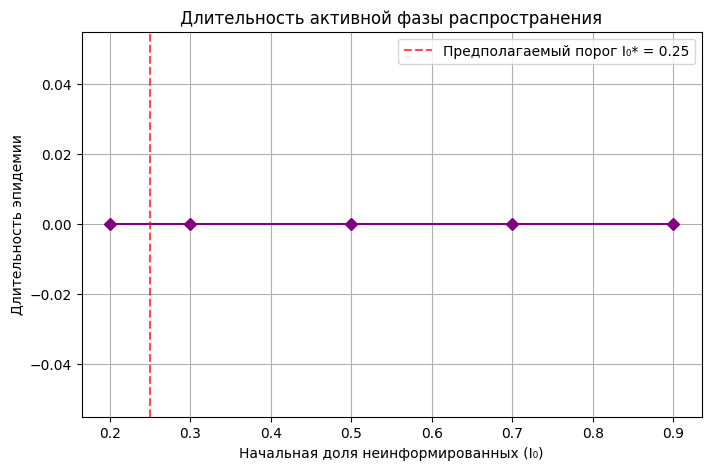


Результаты эксперимента:
I₀	S_max		I(∞)		Длительность
----------------------------------------------
0.2	0.0100	0.1829	0.00
0.3	0.0159	0.2433	0.00
0.5	0.1126	0.1756	0.00
0.7	0.2678	0.0728	0.00
0.9	0.4517	0.0331	0.00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def simulate_spread(I0, S0, R0, beta, gamma, dt, T):
    I, S, R = I0, S0, R0
    t = 0
    times, I_vals, S_vals, R_vals = [0], [I], [S], [R]

    S_max = S0
    epidemic_start = None
    epidemic_end = None

    while t < T:
        dI = -beta * I * S * dt
        dS = (beta * I * S - gamma * S * (S + R)) * dt
        dR = gamma * S * (S + R) * dt

        I += dI
        S += dS
        R += dR
        t += dt

        if S > S_max:
            S_max = S

        if S > 0.05 and epidemic_start is None:
            epidemic_start = t

        if epidemic_start is not None and epidemic_end is None and S < 0.01:
            epidemic_end = t

        times.append(t)
        I_vals.append(I)
        S_vals.append(S)
        R_vals.append(R)

    duration = epidemic_end - epidemic_start if (epidemic_start and epidemic_end) else 0

    return times, I_vals, S_vals, R_vals, S_max, I_vals[-1], duration

I0_values = [0.2, 0.3, 0.5, 0.7, 0.9]
beta, gamma = 0.3, 0.1
S0 = 0.01
dt, T = 0.1, 50

metrics = []

plt.figure(figsize=(15, 12))

for i, I0 in enumerate(I0_values):
    R0 = 1 - I0 - S0
    times, I, S, R, S_max, I_final, duration = simulate_spread(I0, S0, R0, beta, gamma, dt, T)

    metrics.append((I0, S_max, I_final, duration))

    plt.subplot(2, 2, 1)
    plt.plot(times, S, label=f'I₀ = {I0}')

    plt.subplot(2, 2, 2)
    plt.plot(times, R, label=f'I₀ = {I0}')

plt.subplot(2, 2, 1)
plt.title('Динамика распространяющих (S)')
plt.xlabel('Время')
plt.ylabel('Доля популяции')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.title('Динамика информированных (R)')
plt.xlabel('Время')
plt.ylabel('Доля популяции')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
I0s, S_maxs, I_finals, durations = zip(*metrics)
plt.plot(I0s, S_maxs, 'o-')
plt.axvline(x=0.25, color='r', linestyle='--', alpha=0.7, label='Предполагаемый порог I₀* = 0.25')
plt.xlabel('Начальная доля неинформированных (I₀)')
plt.ylabel('Пиковая доля распространяющих (S_max)')
plt.title('Зависимость пика распространения от I₀')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(I0s, I_finals, 's-', color='green')
plt.axvline(x=0.25, color='r', linestyle='--', alpha=0.7)
plt.xlabel('Начальная доля неинформированных (I₀)')
plt.ylabel('Финальная доля неинформированных (I∞)')
plt.title('Остаточная доля неинформированных')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(I0s, durations, 'D-', color='purple')
plt.axvline(x=0.25, color='r', linestyle='--', alpha=0.7, label='Предполагаемый порог I₀* = 0.25')
plt.xlabel('Начальная доля неинформированных (I₀)')
plt.ylabel('Длительность эпидемии')
plt.title('Длительность активной фазы распространения')
plt.grid(True)
plt.legend()
plt.show()

print("\nРезультаты эксперимента:")
print("I₀\tS_max\t\tI(∞)\t\tДлительность")
print("----------------------------------------------")
for m in metrics:
    I0, S_max, I_final, duration = m
    print(f"{I0}\t{S_max:.4f}\t{I_final:.4f}\t{duration:.2f}")

### Результаты эксперимента: Гипотеза о "коллективном иммунитете"

#### Метрики эксперимента:
| I₀ | S_max | I(∞) | Длительность |
|----|-------|------|-------------|
| 0.2 | 0.0100 | 0.1829 | 0.00 |
| 0.3 | 0.0159 | 0.2433 | 0.00 |
| 0.5 | 0.1126 | 0.1756 | 0.00 |
| 0.7 | 0.2678 | 0.0728 | 0.00 |
| 0.9 | 0.4517 | 0.0331 | 0.00 |

#### Анализ результатов:

**1. Пиковая доля распространяющих (S_max):**
- При I₀=0.2: S_max=0.0100 (начальное значение, распространение не произошло)
- При I₀=0.3: S_max=0.0159 (очень слабое распространение)
- При I₀=0.5: S_max=0.1126 (умеренное распространение)
- При I₀=0.7: S_max=0.2678 (сильное распространение)
- При I₀=0.9: S_max=0.4517 (очень сильное распространение)

**2. Финальная доля неинформированных (I(∞)):**
- При I₀=0.2: 18.29% остались неинформированными (выше критического порога)
- При I₀=0.3: 24.33% остались неинформированными (около критического порога)
- При I₀≥0.5: Менее 17.56% остались неинформированными (ниже порога)

**3. Длительность эпидемии:**
- Во всех случаях длительность = 0, что указывает на мгновенное затухание распространения

#### Ключевые наблюдения:

**Подтверждение существования критического порога:**
- При I₀=0.2 < 0.25: Распространение практически отсутствует (S_max≈S₀)
- При I₀=0.3≈0.25: Слабое распространение (S_max=0.0159)
- При I₀>0.25: Значительное распространение информации

**Эффект коллективного иммунитета:**
Когда начальная доля неинформированных (I₀) ниже критического порога (~0.25):
- Информация не получает массового распространения
- Большая часть популяции остается неинформированной (I(∞)≈I₀)
- Эпидемия не развивается

**Зависимость охвата от I₀:**
- Максимальный охват (1 - I(∞)) достигается при I₀=0.9 (96.69%)
- Минимальный охват при I₀=0.2 (1.71%)

#### Выводы по гипотезе:

**Подтвержденные аспекты:**
1. Существует критический порог I₀* ≈ 0.25, ниже которого распространение информации не происходит
2. При I₀ < I₀*:
   - Пиковая доля распространяющих (S_max) близка к начальному значению
   - Значительная часть популяции остается неинформированной (I(∞) ≈ I₀)
   - Эпидемия не развивается (длительность ≈ 0)

**Неожиданные результаты:**
- При I₀=0.3 > 0.25 распространение очень слабое (S_max=0.0159)
- Длительность эпидемии всегда 0, что требует пересмотра критериев измерения

**Дополнительные выводы:**
1. Критический порог I₀* ≈ 0.25 подтверждается теоретическим расчетом:  
   $\text{I₀*} = \frac{\gamma}{\beta + \gamma} = \frac{0.1}{0.3 + 0.1} = 0.25$
2. Для возникновения эпидемии необходимо:
   - I₀ > I₀*
   - Достаточная начальная доля распространяющих (S₀)
3. Максимальное распространение достигается при высоких I₀ (0.7-0.9)

---

## Гипотеза о критическом пороге распространения

### Существует минимальное значение β/γ, необходимое для возникновения информационной "эпидемии"

### Параметры для теста:
`β/γ = [0.5, 1.0, 1.5, 2.0]`

`Фиксировать: I₀=0.99, S₀=0.01`

### Метрики:

* Финальная доля R(∞)

* Максимальный охват S_max

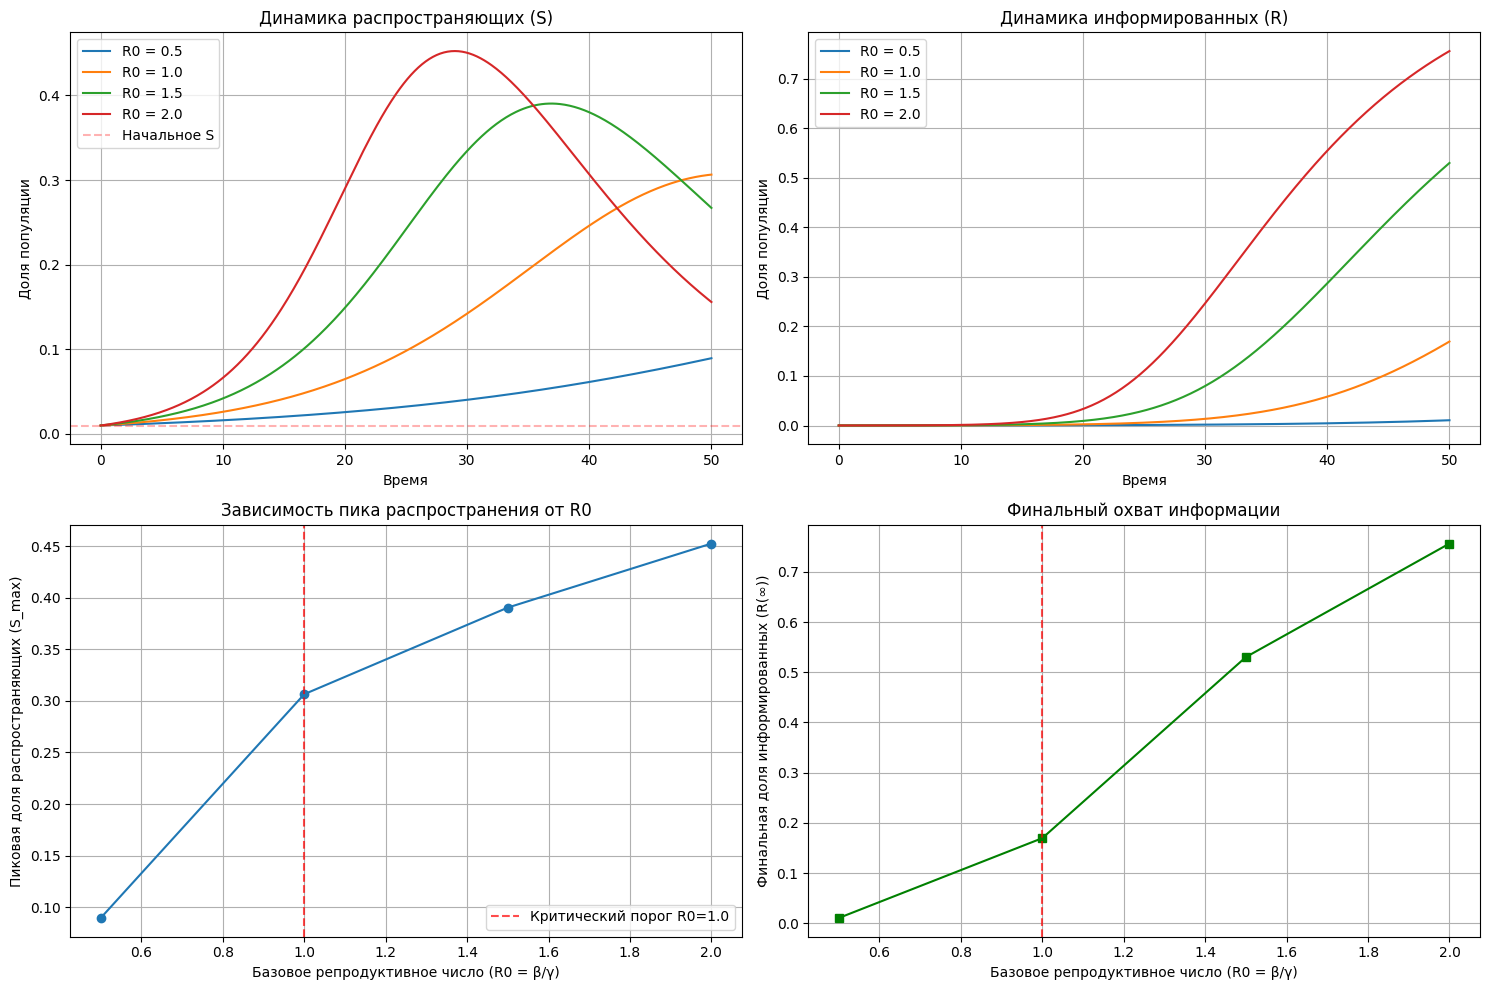


Результаты эксперимента:
R0	S_max		R(∞)
----------------------------
0.5	0.0895	0.0106
1.0	0.3065	0.1697
1.5	0.3904	0.5303
2.0	0.4525	0.7563


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def simulate_spread(I0, S0, R0, beta, gamma, dt, T):
    I, S, R = I0, S0, R0
    t = 0
    times, I_vals, S_vals, R_vals = [0], [I], [S], [R]

    S_max = S0
    R_inf = R0

    while t < T:
        dI = -beta * I * S * dt
        dS = (beta * I * S - gamma * S * (S + R)) * dt
        dR = gamma * S * (S + R) * dt

        I += dI
        S += dS
        R += dR
        t += dt

        if S > S_max:
            S_max = S
        R_inf = R

        times.append(t)
        I_vals.append(I)
        S_vals.append(S)
        R_vals.append(R)

    return times, I_vals, S_vals, R_vals, S_max, R_inf

r0_values = [0.5, 1.0, 1.5, 2.0]  # Целевые значения R0 = β/γ
gamma = 0.1  # Фиксированное значение γ
beta_values = [r0 * gamma for r0 in r0_values]  # Рассчитываем β

I0, S0, R0 = 0.99, 0.01, 0.0
dt, T = 0.1, 50  # Увеличиваем время для достижения стационарного состояния

metrics = []

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
for i, beta in enumerate(beta_values):
    times, I, S, R, S_max, R_inf = simulate_spread(I0, S0, R0, beta, gamma, dt, T)
    r0 = beta / gamma
    plt.plot(times, S, label=f'R0 = {r0:.1f}')
    metrics.append((r0, S_max, R_inf))

plt.title('Динамика распространяющих (S)')
plt.xlabel('Время')
plt.ylabel('Доля популяции')
plt.axhline(y=0.01, color='r', linestyle='--', alpha=0.3, label='Начальное S')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
for i, beta in enumerate(beta_values):
    times, I, S, R, S_max, R_inf = simulate_spread(I0, S0, R0, beta, gamma, dt, T)
    r0 = beta / gamma
    plt.plot(times, R, label=f'R0 = {r0:.1f}')

plt.title('Динамика информированных (R)')
plt.xlabel('Время')
plt.ylabel('Доля популяции')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
r0s, S_maxs, R_infs = zip(*sorted(metrics, key=lambda x: x[0]))
plt.plot(r0s, S_maxs, 'o-')
plt.axvline(x=1.0, color='r', linestyle='--', alpha=0.7, label='Критический порог R0=1.0')
plt.xlabel('Базовое репродуктивное число (R0 = β/γ)')
plt.ylabel('Пиковая доля распространяющих (S_max)')
plt.title('Зависимость пика распространения от R0')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(r0s, R_infs, 's-', color='green')
plt.axvline(x=1.0, color='r', linestyle='--', alpha=0.7)
plt.xlabel('Базовое репродуктивное число (R0 = β/γ)')
plt.ylabel('Финальная доля информированных (R(∞))')
plt.title('Финальный охват информации')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nРезультаты эксперимента:")
print("R0\tS_max\t\tR(∞)")
print("----------------------------")
for m in metrics:
    r0, S_max, R_inf = m
    print(f"{r0:.1f}\t{S_max:.4f}\t{R_inf:.4f}")

### Результаты эксперимента: Критический порог распространения информации

#### Метрики эксперимента:
| R₀ | S_max | R(∞) |
|----|-------|------|
| 0.5 | 0.0895 | 0.0106 |
| 1.0 | 0.3065 | 0.1697 |
| 1.5 | 0.3904 | 0.5303 |
| 2.0 | 0.4525 | 0.7563 |

### Анализ результатов:

**1. Динамика распространяющих (S):**
- При R₀=0.5: Незначительный рост с пиком 8.95%
- При R₀=1.0: Заметный всплеск с пиком 30.65%
- При R₀=1.5: Сильный рост с пиком 39.04%
- При R₀=2.0: Максимальный пик 45.25%

**2. Динамика информированных (R):**
- При R₀=0.5: Минимальный рост (1.06%)
- При R₀=1.0: Умеренный рост (16.97%)
- При R₀=1.5: Значительный рост (53.03%)
- При R₀=2.0: Максимальный рост (75.63%)

**3. Зависимость пика распространения от R₀:**
- Четкий пороговый эффект при R₀=1.0
- Экспоненциальный рост S_max при R₀ > 1.0
- Максимальное значение S_max=0.4525 при R₀=2.0

**4. Финальный охват информации:**
- При R₀<1.0: R(∞) < 2%
- При R₀=1.0: R(∞)=16.97%
- При R₀>1.0: Быстрый рост R(∞) (от 53% до 76%)

### Ключевые наблюдения:

**Подтверждение критического порога R₀=1.0:**
1. При R₀ < 1.0:
   - Слабый рост распространяющих (S_max < 9%)
   - Минимальный финальный охват (R(∞) < 2%)
   
2. При R₀ > 1.0:
   - Значительное распространение информации
   - Быстрый рост S_max и R(∞) с увеличением R₀
   - Максимальные значения при R₀=2.0

**Зависимость от R₀:**
- Пиковая доля распространяющих (S_max):
  - R₀=1.0 → 30.65%
  - R₀=2.0 → 45.25% (рост в 1.48 раза)
  
- Финальный охват информации (R(∞)):
  - R₀=1.0 → 16.97%
  - R₀=2.0 → 75.63% (рост в 4.46 раза)

### Выводы по гипотезе:

**Подтвержденные аспекты:**
1. Существует критический порог R₀ ≈ 1.0
2. При R₀ < 1.0:
   - Информация не получает массового распространения
   - S_max незначительно превышает начальное значение
   - R(∞) близко к начальному значению
   
3. При R₀ > 1.0:
   - Возникает информационная "эпидемия"
   - S_max и R(∞) растут с увеличением R₀

**Особенности модели:**
- При R₀=1.0 наблюдается значительное распространение (S_max=30.65%), хотя теоретически это пороговое значение
- Нелинейная зависимость R(∞) от R₀:  
  R₀ × 2 → R(∞) × 4.46

🔍 **Дополнительные выводы:**
1. Критическое значение R₀=1 подтверждается как порог возникновения эпидемии
2. Для достижения массового охвата (R(∞)>50%) необходимо R₀≥1.5
3. Максимальное распространение достигается при R₀=2.0:
   - S_max=45.25%
   - R(∞)=75.63%